# Experiments with VBOX data

Using pandas for data-handling, and matplotlib for drawing, starting from the VBO files produced by the VBOX.

In [191]:
# Make a few things prettier
%matplotlib inline
from IPython.display import HTML
display.HTML(data="<style>.rendered_html th {font-size: 10pt; background-color: #eee}</style>")

In [192]:
# Get a CSV and geojson version of the VBOX data
import glob, os
basenames = [os.path.basename(v)[:-4] for v in glob.glob('uploads/*.vbo')]
basename = basenames[0]

import vbox
with open('uploads/%s.vbo' % basename) as f:
    vbo = vbox.VBoxData(f)
with open('uploads/%s.csv' % basename, 'w') as outf:
    vbo.write_csv(outf)
with open('uploads/%s.json' % basename, 'w') as outf:
    vbo.write_geojson(outf)

Now we can read that CSV file in as a Pandas dataframe:

In [193]:
import matplotlib as plt
import pandas as pd
from datetime import datetime

t = pd.read_csv('uploads/%s.csv' % basename, index_col='datetime', parse_dates=True)
# Let's look at a few rows
t.head()
t.lat

datetime
2015-07-09 11:18:56    52.387961
2015-07-09 11:18:56    52.387961
2015-07-09 11:18:56    52.387961
2015-07-09 11:18:56    52.387961
2015-07-09 11:18:56    52.387961
2015-07-09 11:18:56    52.387961
2015-07-09 11:18:57    52.387961
2015-07-09 11:18:57    52.387961
2015-07-09 11:18:57    52.387961
2015-07-09 11:18:57    52.387961
2015-07-09 11:18:57    52.387961
2015-07-09 11:18:57    52.387961
2015-07-09 11:18:57    52.387961
2015-07-09 11:18:57    52.387961
2015-07-09 11:18:57    52.387961
2015-07-09 11:18:57    52.387961
2015-07-09 11:18:58    52.387961
2015-07-09 11:18:58    52.387961
2015-07-09 11:18:58    52.387961
2015-07-09 11:18:58    52.387961
2015-07-09 11:18:58    52.387961
2015-07-09 11:18:58    52.387961
2015-07-09 11:18:58    52.387962
2015-07-09 11:18:58    52.387962
2015-07-09 11:18:58    52.387962
2015-07-09 11:18:58    52.387962
2015-07-09 11:18:59    52.387962
2015-07-09 11:18:59    52.387962
2015-07-09 11:18:59    52.387962
2015-07-09 11:18:59    52.387962
 

In [194]:
t.describe()


,sats,time,lat,long,velocity,heading,height,vert_vel,dgps,PedalPos_CH,BrakePressure_HS1_CH,SteeringWheelAngle_CH,DirectionIndicationSwitchHS_CH,VehicleSpeed_HS1_CH,GearLeverPositionHS_CH,UB_DrivSeatBeltBcklState_CH,CruiseStatus2_PT,SpeedtoMPH,avifileindex,avitime
count,32894.000000,32894.000000,32894.000000,32894.000000,32894.000000,32894.000000,32894.000000,32894.000000,32894,32894.000000,32894.000000,32894.000000,32894.000000,32894.000000,32894.000000,32894.000000,32894,32894.000000,32894,32894.000000
mean,6.812276,42381.100462,52.386531,-1.531419,38.502398,163.853447,130.070546,0.088831,0,14.266325,3.923348,3.762070,0.180823,38.730165,2.989664,0.000122,0,24.206346,1,1644559.461209
std,0.816034,949.625715,0.023117,0.036741,28.763565,107.122407,9.881753,0.439886,0,15.889493,10.368843,69.753165,0.516545,28.679720,0.498576,0.011027,0,17.924823,0,949576.762290
min,0.000000,40736.500000,52.330150,-1.591298,0.000000,0.000000,98.590000,-1.860000,0,0.000000,0.000000,-423.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,1,-1.000000
25%,6.000000,41558.725000,52.377270,-1.559992,18.106000,72.580000,123.550000,-0.130000,0,0.000000,0.000000,-6.200010,0.000000,18.702500,3.000000,0.000000,0,11.689050,1,822230.000000
50%,7.000000,42381.150000,52.389123,-1.530136,36.347500,150.540000,128.700000,0.100000,0,9.000000,0.000000,-1.899960,0.000000,36.500000,3.000000,0.000000,0,22.812500,1,1644600.000000
75%,7.000000,43203.475000,52.406484,-1.497729,54.512000,249.277500,134.910000,0.300000,0,26.500000,0.000000,4.799990,0.000000,54.790000,3.000000,0.000000,0,34.243700,1,2466900.000000
max,8.000000,44025.800000,52.412049,-1.465218,137.504000,359.970000,156.760000,2.520000,0,65.500000,99.400000,444.700000,2.000000,136.950000,7.000000,1.000000,0,85.593700,1,3288640.000000


I'll talk more about this on  [my blog](http://statusq.org).

Here's a simple x/y plot of long/lat, showing every 10th point:

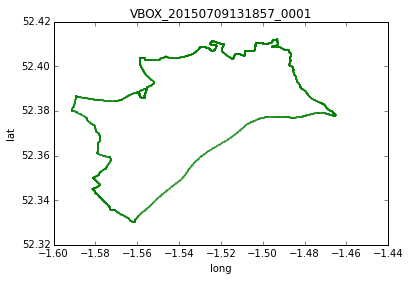

In [195]:
t[::10].plot(x='long', y='lat', kind='scatter', marker='.', color='g', title=basename, s=1)

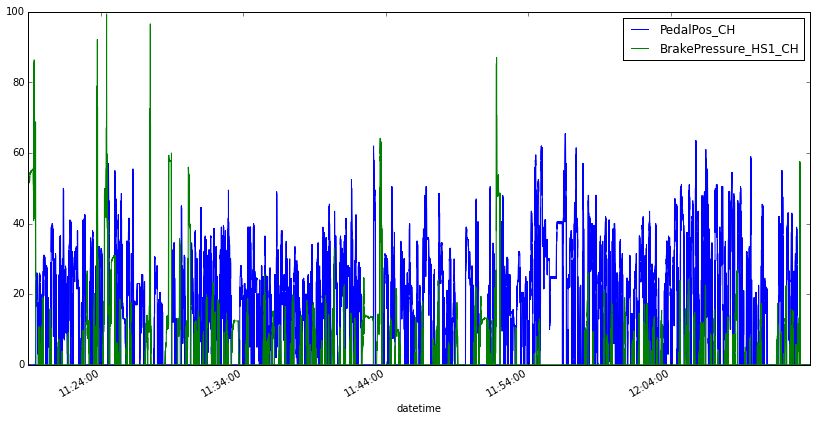

In [196]:
t[['PedalPos_CH', 'BrakePressure_HS1_CH']].plot(figsize=(14,7))

One way to zoom in is to restrict the time (index) axis to a subset of the data:

In [197]:
# t[['PedalPos_CH', 'BrakePressure_HS1_CH']].between_time('11:40', '11:50').plot(figsize=(14,7))

Or we can limit the axes of the plot; pandas conveniently converts strings to datetimes but they do need to include the date:

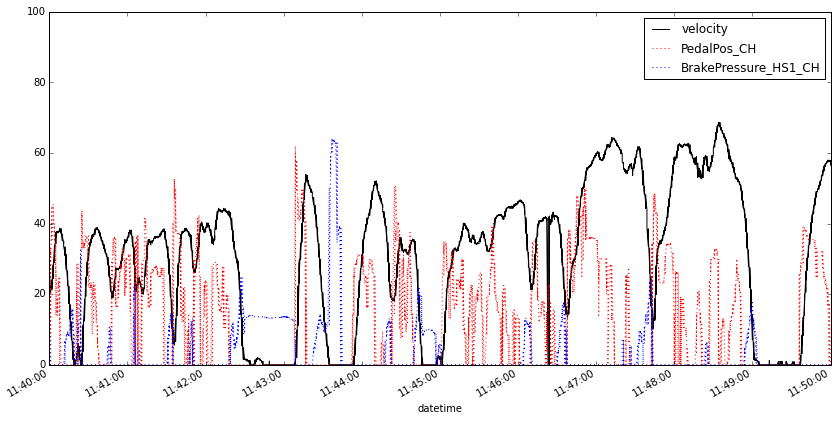

In [198]:
t[['velocity', 'PedalPos_CH', 'BrakePressure_HS1_CH']].plot(figsize=(14,7), 
                                                            xlim=('2015-07-09 11:40:00','2015-07-09 11:50:00'), 
                                                            ylim = (0,100),
                                                            style=['k', 'r:', 'b:'])

How good was our satellite coverage?

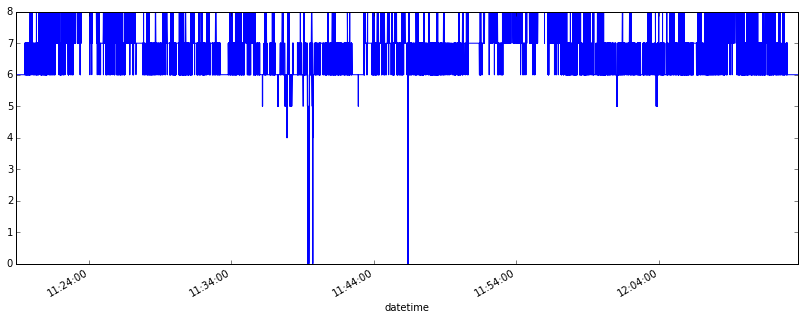

In [199]:
t.sats.plot(figsize=(14,5))

In [200]:
# This doesn't work yet.
import gmap
# We already have the geojson.  Let's create a map that displays it
mapname = 'uploads/%s-gmap.html' % basename
google_map = gmap.GoogleMap(t[::30], json_url='%s.json' % basename)
with open(mapname, 'w') as outfile:
    outfile.write(google_map.to_html())
HTML('<iframe src="files/%s" width=900 height=700></iframe>' % mapname)

Stuff about notebook extensions [here](https://github.com/ipython-contrib/IPython-notebook-extensions/wiki).


Here's a useful page about [folium and geopandas](http://nbviewer.ipython.org/gist/choct155/7846849), and here are the [folium docs](https://folium.readthedocs.org/en/latest/).

# Folium

Using Folium, we can plot the route, and highlight the points that have weak GPS signals.

In [205]:
import folium

centre_lat, centre_lon = (t.lat.max() + t.lat.min())/2.0, (t.long.max() + t.long.min())/2.0
map = folium.Map(location=[centre_lat, centre_lon], zoom_start=12)
# map.geo_json(geo_path='uploads/%s.json' % basename, line_color='red', line_weight=2, line_opacity=0.8,)
for i, b in enumerate(basenames):
   map.geo_json(geo_path='uploads/%s.json' % b , line_color=['red', '#ffaa55', 'blue', 'yellow'][i % 4], line_weight=2, line_opacity=0.8,)
 
# weak_gps = t[t.sats < 6]
# for tstamp, wp in weak_gps.iterrows():
#     map.circle_marker(location=[wp.lat, wp.long], radius=100,
#                       popup='My Popup Info', line_color='#3186cc',
#                       fill_color='#3186cc', fill_opacity=0.2)

map.create_map(path='osm.html')
HTML('<iframe src="files/osm.html" width=1000 height=500></iframe>')